In [10]:
#!pip install qiskit-ibm-runtime
#%pip install qiskit==1.4.3

In [36]:
import qiskit as qk
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import SamplerV2, Estimator
from qiskit_ibm_runtime.fake_provider import FakeManilaV2

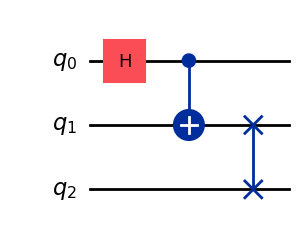

In [46]:
# Create a simple circuit
circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cx(0,1)
circuit.swap(1,2)
#circuit.measure_all()
circuit.draw('mpl', style="iqp")

In [43]:
backend = FakeManilaV2()

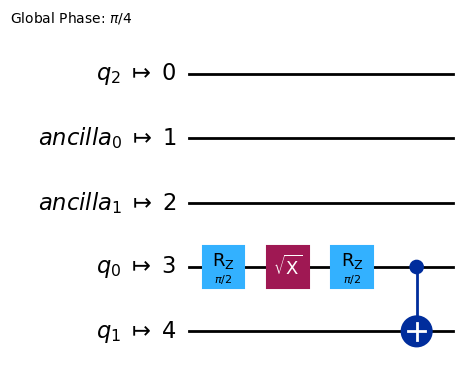

In [47]:
# Transpile the ideal circuit to a circuit that can be
# directly executed by the backend
transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw('mpl', style="iqp")

In [48]:
# Run the transpiled circuit using the simulated fake backend
sampler = SamplerV2(backend)
job = sampler.run([transpiled_circuit])
pub_result = job.result()[0]
counts = pub_result.data.meas.get_counts()
plot_histogram(counts)

C:\Users\Gustav Mahler\AppData\Local\Programs\Python\Python313\Lib\site-packages\qiskit_ibm_runtime\utils\validations.py:40: UserWarning: The 0-th circuit has no output classical registers so the result will be empty. Did you mean to add measurement instructions?
  warnings.warn(
C:\Users\Gustav Mahler\AppData\Local\Programs\Python\Python313\Lib\site-packages\qiskit\primitives\backend_sampler_v2.py:173: UserWarning: The 0-th pub's circuit has no output classical registers and so the result will be empty. Did you mean to add measurement instructions?
  warnings.warn(


AttributeError: 'DataBin' object has no attribute 'meas'

In [55]:
from qiskit.quantum_info import SparsePauliOp

pauli_list = [("III", 1), ("IXX", 1), ("XIX", 1), ("XXI", 1), ("IYY", -1),("YIY", -1),("YYI", -1), ("IZZ", 1), ("ZIZ", 1), ("ZZI", 1)]
op = SparsePauliOp.from_list(pauli_list)
transpiled_op = op.apply_layout(transpiled_circuit.layout)

estimator = Estimator(backend)
job = estimator.run([(transpiled_circuit, transpiled_op)])
result = job.result()[0]
evs = result.data.evs
print(evs)

3.751953125


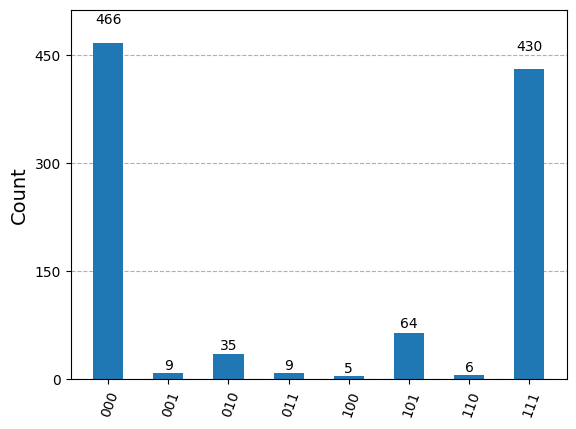

In [15]:
# Run the transpiled circuit using the simulated fake backend
sampler = SamplerV2(backend)
job = sampler.run([transpiled_circuit])
pub_result = job.result()[0]
counts = pub_result.data.meas.get_counts()
plot_histogram(counts)

In [16]:
# from qiskit_ibm_runtime import QiskitRuntimeService
# from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
 
# # initialize service to access real backends
# service = QiskitRuntimeService()
 
# # call refresh to retrieve latest backend data
# # note that this overwrites your local qiskit-ibm-runtime files
# backend = FakeSherbrooke()
# backend.refresh(service)

In [ ]:
!pip install -U qiskit-aer

from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit_aer.noise import noise_model_from_backend

backend = FakeSherbrooke()
noise_model = noise_model_from_backend(backend)
